angles = [0.         0.34906585 0.52359878 0.34906585]


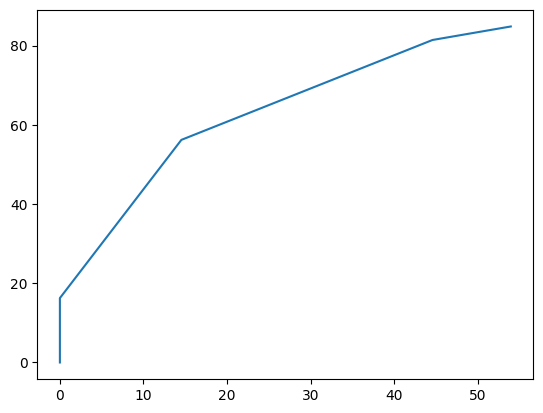

In [ ]:
import numpy as np 
import math 
import matplotlib.pyplot as plt

### Define Robot Body
# Link length 
L0 = 162.5
L1 = 425
L2 = 392.2
L3 = 99.7 
links= [L0/10,L1/10,L2/10,L3/10]


##returns array with position for each link,
    #angels in radians links in mm
def forewardkin2(links,angles):
    print('angles =', angles)
    #end of each Link
    Ex0 =  0# base 
    Ey0 = links[0]
    Ey1 = math.cos(angles[1])*links[1] + Ey0
    Ex1 = math.sin(angles[1])*links[1] + Ex0
    Ey2 = math.cos(angles[1]+angles[2])*links[2] + Ey1
    Ex2 = math.sin(angles[1]+angles[2])*links[2] + Ex1
    Ey3 = math.cos(angles[1]+angles[2]+ angles[3]) * links[3] + Ey2
    Ex3 = math.sin(angles[1]+angles[2]+angles[3]) * links[3] + Ex2 
    #return np.array( [[Ex0,Ey0],[Ex1,Ey1],[Ex2,Ey2],[Ex3,Ey3]])
    return np.array([[0,Ex0,Ex1,Ex2,Ex3],[0,Ey0,Ey1,Ey2,Ey3]])


angles = np.deg2rad([0,20,30,20])
joints = forewardkin2(links, angles)
#print(joints)
plt.figure
plt.plot(joints[0],joints[1])


In [ ]:
import gymnasium as gym 
from gym import spaces 
import numpy as np 


class TwoD_Robot(gym.Env): 
    def __init__(self, goal = np.array([50,30,10])):

        self.L1 = 42.5 
        self.L2 = 39.22 
        self.L3 = 9.97

        self.goal = np.array(goal)
        # Action space: [delta_Theta1, delta_Theta2, delta_Theta3]
        self.action_space = spaces.Box(low= -0.1, high =0.1, shape = (3,), dtype = np.float32)
        # observation space, x,y, theta1,theta2,theta3 
        self.observation_space = spaces.Box( 
            low= np.array([-200,-200, -np.pi,-np.pi, -np.pi,-np.pi]),
            high= np.array([200,200, np.pi, np.pi, np.pi,np.pi]),
            dtype = np.float32 
        )

        #initial joint angles 
        self.theta = np.array([0.0,0.0,0.0])

        self.ee_pose = self.Fkin(self.theta)
        

        def Fkin(self,theta):
            """compute Endeffector Pose and returns x,y and theta (angles). zero pose is a vertical line"""
            x = (self.L1 * np.sin(theta[0]) +
                self.L2 * np.sin(theta[0] + theta[1]) +
                self.L3 * np.sin(theta[0] + theta[1] + theta[2]))
            y = (self.L1 * np.cos(theta[0]) +
                self.L2 * np.cos(theta[0] + theta[1]) +
                self.L3 * np.cos(theta[0] + theta[1] + theta[2]))
            theta_E = theta[0] + theta[1] + theta[2]

            return np.array([x,y,theta_E])

        def reset(self):
            self.theta = np.random.uniform(-np.pi, np.pi, size = 3)
            self.ee_position = self.forward_kinematics(self.theta)
            return np.array(self.ee_position, self.theta)
        
        def step(self,action):

            self.theta += action 
            self.theta = np.clip(self.theta, -np.pi, np.pi)  # Keep angles in range
            self.ee_position = self.forwar_kinematics(self.theta)


